## Multi-label prediction with SF Crime dataset

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import geopandas as gpd

In [4]:
shp = gpd.read_file('geo_export_39010e26-0a56-45fa-9d5c-e956c3d4fddf.shp')
shp.tail()

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,oneway,rt_fadd,rt_toadd,st_type,street,street_gc,streetname,t_node_cnn,zip_code,geometry
16236,Y,5,3155002.0,3155002,None,35069000.0,DPW,STREETS,721.0,763.0,...,B,722.0,768.0,None,BROADWAY,BROADWAY,BROADWAY,25066000.0,94133,LINESTRING (-122.4090400209643 37.797574666436...
16237,N,5,15212000.0,15212000,None,20170000.0,DPW,STREETS,801.0,899.0,...,B,800.0,898.0,AVE,FAIRFAX,FAIRFAX,FAIRFAX AVE,35070000.0,94124,LINESTRING (-122.379414567742 37.7352446750316...
16238,N,5,15213000.0,15213000,None,35070000.0,DPW,STREETS,901.0,999.0,...,B,900.0,998.0,AVE,FAIRFAX,FAIRFAX,FAIRFAX AVE,35016000.0,94124,LINESTRING (-122.3801278068462 37.735283366487...
16239,N,5,15214000.0,15214000,None,54359000.0,DPW,STREETS,0.0,0.0,...,B,0.0,0.0,WAY,IRONWOOD,IRONWOOD,IRONWOOD WAY,35070000.0,94124,LINESTRING (-122.380131921192 37.7349854859701...
16240,N,5,15215000.0,15215000,None,35070000.0,DPW,STREETS,0.0,0.0,...,B,0.0,0.0,WAY,IRONWOOD,IRONWOOD,IRONWOOD WAY,35018000.0,94124,LINESTRING (-122.3801278068462 37.735283366487...


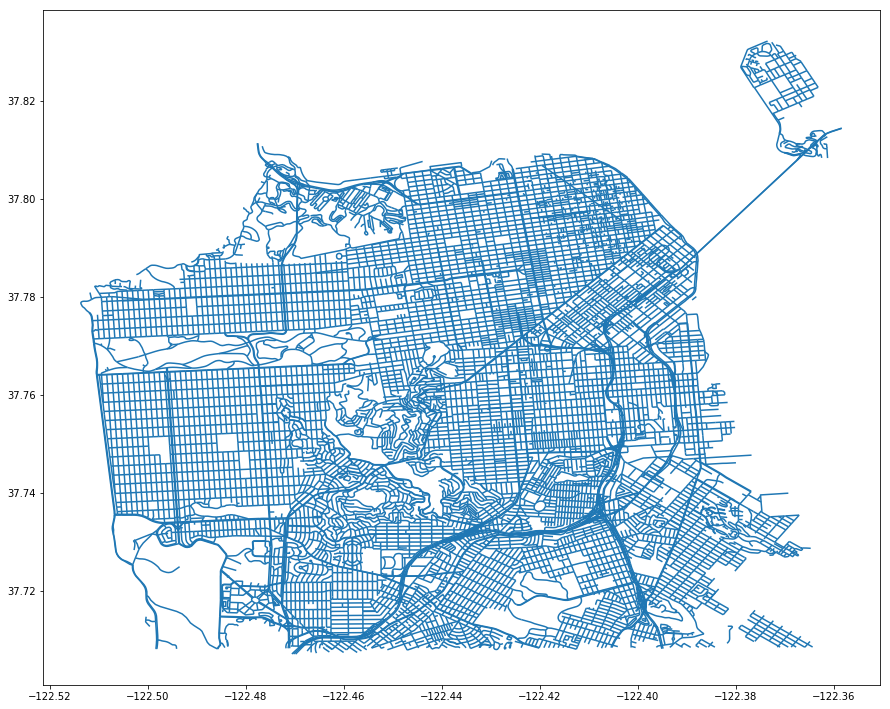

In [5]:
shp.plot(figsize = (15, 15))

In [6]:
shp["x"] = shp.geometry.centroid.map(lambda p: p.x)
shp["y"] = shp.geometry.centroid.map(lambda p: p.y)

In [7]:
shp.T

,0,1,2,3,4,5,6,7,8,9,...,16231,16232,16233,16234,16235,16236,16237,16238,16239,16240
accepted,N,Y,Y,Y,N,N,N,N,N,N,...,Y,N,N,N,Y,Y,N,N,N,N
classcode,0,0,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
cnn,1.5145e+07,1.1305e+07,1.1305e+07,1.3798e+07,5.389e+06,5.389e+06,1.5146e+07,1.5147e+07,1.5148e+07,1.5149e+07,...,6.536e+06,1.5209e+07,1.521e+07,1.5211e+07,3.155e+06,3.155e+06,1.5212e+07,1.5213e+07,1.5214e+07,1.5215e+07
cnntext,15145000,11305001,11305002,13798000,5389001,5389002,15146000,15147000,15148000,15149000,...,6536002,15209000,15210000,15211000,3155001,3155002,15212000,15213000,15214000,15215000
district,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
f_node_cnn,2.6132e+07,2.6255e+07,5.4224e+07,3.5015e+07,3.5016e+07,3.5017e+07,3.5016e+07,3.5018e+07,2.0172e+07,3.5019e+07,...,3.5068e+07,3.3129e+07,3.5067e+07,3.5067e+07,2.5057e+07,3.5069e+07,2.017e+07,3.507e+07,5.4359e+07,3.507e+07
jurisdicti,None,DPW,DPW,DPW,DPW,DPW,DPW,DPW,DPW,DPW,...,DPW,DPW,DPW,DPW,DPW,DPW,DPW,DPW,DPW,DPW
layer,PRIVATE,UPROW,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,...,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS,STREETS
lf_fadd,0,1,39,221,1001,1101,300,200,100,200,...,1071,701,801,901,701,721,801,901,0,0
lf_toadd,0,37,99,299,1099,1199,398,298,198,298,...,1099,799,899,999,719,763,899,999,0,0


In [8]:
shp = shp[(shp["lf_fadd"] > 0) | (shp["lf_toadd"] > 0) | (shp["rt_fadd"] > 0) | (shp["rt_toadd"] > 0)]

In [9]:
ffields = ["layer", "nhood", "streetname", "zip_code", "x", "y" , "mean_dist_10_crimes"]

In [10]:
import pandas as pd
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [11]:
df.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
145864,180318696,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Monday,04/30/2018,00:40,SOUTHERN,NONE,1100 Block of MISSION ST,-122.412737,37.777712,"(37.777712440431586, -122.41273670742505)",18031869664085
145865,180318680,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Monday,04/30/2018,00:16,RICHMOND,"ARREST, BOOKED",PACIFIC AV / DIVISADERO ST,-122.441334,37.792511,"(37.79251071353018, -122.4413341830957)",18031868027130
145866,180318680,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,04/30/2018,00:16,RICHMOND,"ARREST, BOOKED",PACIFIC AV / DIVISADERO ST,-122.441334,37.792511,"(37.79251071353018, -122.4413341830957)",18031868016710
145867,180318680,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,04/30/2018,00:16,RICHMOND,"ARREST, BOOKED",PACIFIC AV / DIVISADERO ST,-122.441334,37.792511,"(37.79251071353018, -122.4413341830957)",18031868006242
145868,180318674,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Monday,04/30/2018,00:35,TENDERLOIN,NONE,200 Block of OFARRELL ST,-122.408520,37.786404,"(37.7864044708209, -122.40851970734619)",18031867404014


In [12]:
violent = ['ASSAULT', 'EXTORTION','SEX OFFENSES, FORCIBLE','WEAPON LAWS', 'MISSING PERSON', 'ROBBERY', 'BURGLARY']
property_crime = ['LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM']
all_crimes = violent + property_crime

In [13]:
crimes_df = df[df['Category'].isin(all_crimes)]

In [14]:
crimes_df.reset_index(inplace=True, drop=True)
crimes_df.tail()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
88871,180318793,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Monday,04/30/2018,04:02,CENTRAL,NONE,700 Block of SANSOME ST,-122.401906,37.797199,"(37.79719948007554, -122.40190571456567)",18031879305073
88872,180318787,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,04/30/2018,04:00,BAYVIEW,NONE,100 Block of BOUTWELL ST,-122.405478,37.734799,"(37.73479877406944, -122.4054782872834)",18031878706242
88873,180318759,ASSAULT,BATTERY WITH SERIOUS INJURIES,Monday,04/30/2018,02:00,CENTRAL,NONE,600 Block of BUSH ST,-122.407690,37.790242,"(37.790242389274205, -122.40768958150248)",18031875904136
88874,180318680,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,04/30/2018,00:16,RICHMOND,"ARREST, BOOKED",PACIFIC AV / DIVISADERO ST,-122.441334,37.792511,"(37.79251071353018, -122.4413341830957)",18031868006242
88875,180318674,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Monday,04/30/2018,00:35,TENDERLOIN,NONE,200 Block of OFARRELL ST,-122.408520,37.786404,"(37.7864044708209, -122.40851970734619)",18031867404014


In [15]:
from sklearn.neighbors import KDTree
import numpy as np

## Getting the data

In [16]:
len(shp)

15253

In [17]:
vc_tree = KDTree(crimes_df[crimes_df['Category'].isin(violent)][["Y","X"]], leaf_size = 20)
pc_tree = KDTree(crimes_df[crimes_df['Category'].isin(property_crime)][["Y","X"]], leaf_size = 20)

In [18]:
shp["mean_dist_30_vcrimes"] = np.mean(vc_tree.query(shp[["y", "x"]], k = 30)[0], axis = 1)
shp["mean_dist_30_pcrimes"] = np.mean(pc_tree.query(shp[["y", "x"]], k = 30)[0], axis = 1)

shp["vcrime_pct_rank"] = shp['mean_dist_30_vcrimes'].rank(pct=True)
shp["pcrime_pct_rank"] = shp['mean_dist_30_pcrimes'].rank(pct=True)


In [19]:
def define_crime_labels(vcrime, pcrime): 
    labels = []
    for item in [("violent_crime" , vcrime), ("property_crime", pcrime)]:
        k,v = item
        if v > .80 : 
            level = "very_high"
        elif v > .60:
            level = "high"
        elif v > .35: 
            level = "medium"
        else:
            level = "low" 
    
        labels += [f"{level}_{k}"]
    labels = " ".join(labels)
    if labels in ["medium_violent_crime low_property_crime",
                  "low_violent_crime medium_property_crime",
                  "low_violent_crime low_property_crime"]: 
        labels = "low_crime"
    return labels

In [20]:
shp["tags"] = shp.apply(lambda row: define_crime_labels(row["vcrime_pct_rank"], \
                                                              row["pcrime_pct_rank"], 
                                                             ), axis = 1)

In [27]:
shp["tcrime_pct_rank"] = shp['mean_dist_30_vcrimes'].rank(pct=True, ascending = False)

In [21]:
shp.tail().T

,16234,16235,16236,16237,16238
accepted,N,Y,Y,N,N
classcode,5,5,5,5,5
cnn,1.5211e+07,3.155e+06,3.155e+06,1.5212e+07,1.5213e+07
cnntext,15211000,3155001,3155002,15212000,15213000
district,None,None,None,None,None
f_node_cnn,3.5067e+07,2.5057e+07,3.5069e+07,2.017e+07,3.507e+07
jurisdicti,DPW,DPW,DPW,DPW,DPW
layer,STREETS,STREETS,STREETS,STREETS,STREETS
lf_fadd,901,701,721,801,901
lf_toadd,999,719,763,899,999


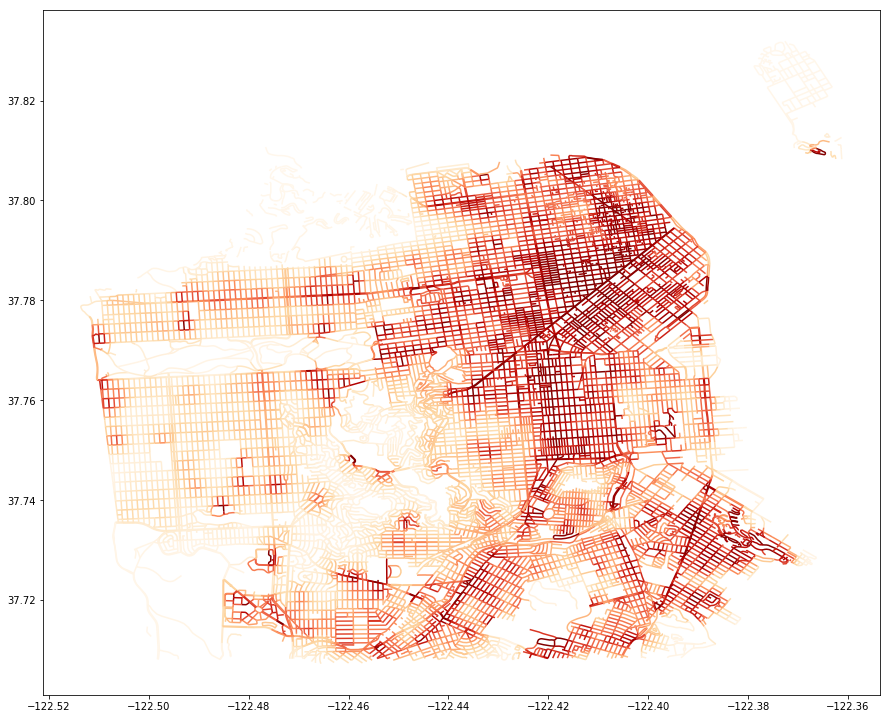

In [28]:
shp.plot(column='tcrime_pct_rank', cmap='OrRd', figsize = (15, 15));

In [112]:
out_fields = ["cnntext", "x", "y", "tags" ]

In [113]:
vcrimes = shp.sort_values(by = "vcrime_pct_rank").head(500).sample(frac = 0.5)[out_fields]
pcrimes = shp.sort_values(by = "pcrime_pct_rank").head(500).sample(frac = 0.5)[out_fields]
tcrimes = shp.sort_values(by = "tcrime_pct_rank", ascending= False).head(500).sample(frac = 0.5)[out_fields]

out_df = pd.concat([vcrimes, pcrimes, tcrimes])

In [114]:
out_df.drop_duplicates(inplace=True)
out_df.tail().T

,3596,792,14891,656,1254
cnntext,11944204,19662000,1541000,19891000,19057000
x,-122.498,-122.473,-122.488,-122.473,-122.472
y,37.709,37.806,37.7884,37.801,37.8019
tags,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime


In [115]:
out_df.rename(index=str, columns={"cnntext" : "image_name"}, inplace= True)

In [116]:
out_df.reset_index(drop = True, inplace= True)

In [117]:
out_df.tail().T

,700,701,702,703,704
image_name,11944204,19662000,1541000,19891000,19057000
x,-122.498,-122.473,-122.488,-122.473,-122.472
y,37.709,37.806,37.7884,37.801,37.8019
tags,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime,very_high_violent_crime very_high_property_crime


In [118]:
out_df.to_csv("train.csv")